## ASSIGNMENT 2


### Part 1

Nonparametric estimation is a statistical method that allows the functional form of a fit to data to be obtained in the absence of any guidance or constraints from theory [1]. There are two kinds of nonparametric estimation techniques available:one is called **Kernel Density Estimation (KDE) or Parzen Windows** and the other is **the k-nearest neighbor-density estimate**. They are fundamentally very similar, but exhibit some different statistical properties [2].

In Part 1 you will make density estimation by using Kernel Density Estimation (Parzen) and kNN from non-parametric density estimation methods and, make classification via Bayesian aproach. In this context, you are given the train and test datasets generated from bimodal 2D Gaussian distributions for two-classes. You are expected to:

1- For each sample *x* at the test set, compute the density estimation (i.e. estimated probabilities of samples using KDE and kNN) to obtain a likelihood P(x | C), for each class C.

2- From the number of examples of each class in the training set, compute the class prior, P(C).

3- For each test point x, get an estimate for the posterior probability for each class is P(C|x)∝P(x|C)P(C). The class which maximizes this posterior is the label assigned to the point.

4-Finally, save your result for each sample with the classification labels in a csv file. 

You are expected to find the Kernel Density estimation using Gaussian Kernels (check the lecture notes for the details) with your own implementations. Make some experiments to determine the best bandwidth for your kernels. You may check your estimations using the Scikitlearn libraries; this tutorial could be helpful as a starter [3].


### Part 2 

You will make a regression analysis to the second dataset, as in your lecture notes, using M=1, M=3, M=6, and M=9. Report the error rate of the f(x) estimations in the test data of your models in a separate cell from regression coding. Tabulate your results with and without regularization. Please also provide your experiment results with different regularization parameters in your reports.

#### Note: Don't forget add comments in your codes.

[1]: https://mathworld.wolfram.com/NonparametricEstimation.html#:~:text=Nonparametric%20estimation%20is%20a%20statistical,have%20no%20meaningful%20associated%20parameters.

[2]:https://www.cs.cmu.edu/~epxing/Class/10701-08s/reading/R1-b.pdf

[3]:https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html 


# Part 1

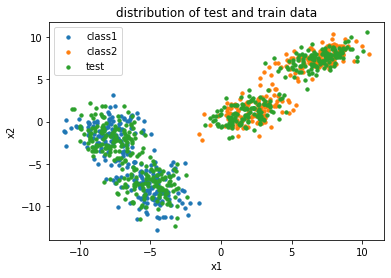

In [1]:
#code here
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#variables are assigned here
bandwidth = 0.5
k_size = 10


# Read csv files
df1 = pd.read_csv("./BBM409_HW2_dataset/Part1/Class1.csv").values.T[1:,:]
df2 = pd.read_csv("./BBM409_HW2_dataset/Part1/Class2.csv").values.T[1:,:]
test = pd.read_csv("./BBM409_HW2_dataset/Part1/Test.csv").values.T[1:,:]

plt.scatter(df1[:, 0] , df1[:, 1], label="class1", s=11)
plt.scatter(df2[:, 0] , df2[:, 1], label="class2", s=11)
plt.scatter(test[:, 0] , test[:, 1], label="test", s=11)

# printing the plot
plt.title("distribution of test and train data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


#Gaussian Kernel is here
def Gaussian_Kernel(u):
    return (1/(math.pi*2))*(math.exp((-1/2)*(u@u.T)))


#computes density estimation using KDE (V is fixed)
def Kernel_Density_Estimation(class_list, point):
    sumOfKernels = 0
    for i in class_list:
        sumOfKernels += Gaussian_Kernel((point-i)/bandwidth)
    return (1/(len(class_list)*(bandwidth**2)))*sumOfKernels
    
    

#computes density estimation using kNN (k is fixed)
# simply, I choose the first k one from the top
# last one gives us what the distance is
def kNN_Likelihood(distance_list):
    return k_size/(len(distance_list)*distance_list[k_size-1])

#compute the distances between the point and the each of the element in the class data
def Compute_Distance(lst, point):
    temp = []
    for i in lst:
        temp.append(math.sqrt((point[0]-i[0])**2 + (point[1]-i[1])**2))
    # I sort it, because it eases the computation while handling the kNN likelihood estimation
    temp.sort()
    return temp


# dataframe variable
data = {"Point":[], "Class1 Parzen":[], "Class1 kNN":[], "Class1 Prior":[], "Class1 Posterior Prob Parzen":[], 
        "Class1 Posterior Prob kNN":[], "Class2 Parzen":[], "Class2 kNN":[], "Class2 Prior":[], 
        "Class2 Posterior Prob Parzen":[], "Class2 Posterior Prob kNN":[]}
df = pd.DataFrame(data)



class1_prior = len(df1)/(len(df1)+len(df2))
class2_prior = len(df2)/(len(df1)+len(df2))
# computations are processed in here for each test data
for i in test:
    class1_dist = Compute_Distance(df1, i)
    class2_dist = Compute_Distance(df2, i)
    class1_parzen = Kernel_Density_Estimation(df1, i)
    class2_parzen = Kernel_Density_Estimation(df2, i)
    class1_kNN = kNN_Likelihood(class1_dist)
    class2_kNN = kNN_Likelihood(class2_dist)
    class1_posterior_prob_parzen = class1_prior * class1_parzen
    class1_posterior_prob_kNN = class1_prior * class1_kNN
    class2_posterior_prob_parzen = class2_prior * class2_parzen
    class2_posterior_prob_kNN = class2_prior * class2_kNN
    
    
    df.loc[len(df.index)] = [(str(i[0])+", "+str(i[1])), class1_parzen, class1_kNN, class1_prior, class1_posterior_prob_kNN, class1_posterior_prob_kNN,
                            class2_parzen, class2_kNN, class2_prior, class2_posterior_prob_kNN, class2_posterior_prob_kNN]

#saving the result in the csv file
df.to_csv("result.csv")

# Part 2

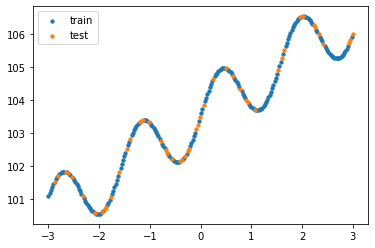

In [2]:
train = pd.read_csv("./BBM409_HW2_dataset/Part2/train.csv").values[:,1:]
test_data = pd.read_csv("./BBM409_HW2_dataset/Part2/test.csv").values[:,1:]

plt.scatter(train[:, 0] , train[:, 1], label="train", s=11)
plt.scatter(test_data[:, 0] , test_data[:, 1], label="test", s=11)


def Generate_Predicted_Equation(m):
    predicted = "w0"
    for i in range(1, m+1):
        temp_w = "w" + str(i)
        temp_x = "(x**" + str(i) + ")"
        predicted += "+(" + temp_w + "*" + temp_x + ")"
    return predicted

def Generate_W_Values(m):
    return [0 if i==0 else 1 for i in range(0,m+1)]


plt.legend()
plt.show()

You can see the regression function code below. I wrote it by myself. It works properly but it is really slow while training with a huge amount of data even if I use the stochastic gradient descent approach. I test it with M=1 and it worked well, you can test it below. However when I wanted to try it M=3, it took so much time and in the end it was not fit completely to the data. I restrict the computation with step_size_limit variable. Whenever the step size converges to that value, process is stopped. I also want to mention about learning rate. It affects the computation a lot. It is neccesary to determine the optimum learning rate while handling the regression. All in all, code works very slowly with huge data but it works though.

You can find the results of my regression 2 cell below. By the way, I test it with different learning rate and step size limit. 

I found that optimum value for the learning rate should be maximum 0.001. Whenever we incease that value it algorithm steps huge steps and this cause unsolvable situation.

Step size limit is to determine how much reliability we want. How close we choose the number, we gain more reliable results. But if we choose so small value, then the algorithm gets hard to find the result.

In [50]:
from sympy import *
x, y, z, w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, observed = symbols('x y z w0 w1 w2 w3 w4 w5 w6 w7 w8 w9 observed')
function = ""

def Tabulate():
    plt.scatter(train[:, 0] , train[:, 1], label="train", s=11)
    plt.scatter(test_data[:, 0] , test_data[:, 1], label="test", s=11)
    plt.legend()
    plt.show()


def Least_Squares_Regression(m, learning_rate, step_size_limit):
    
    global function
    
    predicted = Generate_Predicted_Equation(m)
    w_values = Generate_W_Values(m)
    sum_of_residuals = "(observed - (" + predicted + "))**2"

    #this flag counts the number of slopes for every w variable that converges to 0
    #whenever all the elements in the list are equal to 1, while loop will be broken
    ex = [0 for i in range(0,m+1)]
    
    #we taking the derivative of the sum of residuals to detect minimum error point
    #after we took the derivative, now we ll try to find the optimum value
    #whenever step size converges to 0, we are ok. We ll do it for every w variable of course...
    while True:
        
        print("-----")
        for i in range(m+1):
            
            #if w coefficient converges to 0 enough then continue to next one
            if(ex[i] == 1):
                continue
                        
            w = "w"+str(i)
            slope = 0
            equation = diff(sum_of_residuals, w)
            variables = {}
            for k in range(m+1):
                variables["w"+str(k)] = w_values[k]
            for k in train:
                variables["x"] = k[0]
                variables["observed"] = k[1]
                slope += equation.subs(variables)
            
            step_size = slope*learning_rate
            w_values[i] = w_values[i] - step_size
            
            if abs(step_size) <= step_size_limit:
                ex[i] = 1
            
            
            print(step_size)
            
            
        #if all the w's are converges to 0 then break the while loop
        #regression is completed
        if 0 not in ex:
            break
            
    
    estimated_function = str(w_values[0])
    for i in range(1, m+1):
        estimated_function += "+(" + str(w_values[i]) + "*(x**" + str(i) + "))"
    
    print("Estimated Equation :\n" + estimated_function)
    function = sympify(estimated_function)
    return eval(estimated_function)



#this function returns the error rate
def Error_Rate(test_data):
    
    global function
    
    sum_of_error = 0
    for i in test_data:
        sum_of_error += abs(i[1] - function.subs("x",i[0]))
    print("\nError Rate:\n" + str(sum_of_error/len(test_data)))
    

## M = 1

-----
-41.4234311645758
-0.740924199835714
-----
-24.8440249782561
0.505860119035200
-----
-14.9132654300114
0.0862890634851988
-----
-8.94912779905937
0.101459925517555
-----
-5.37085066686070
0.0495333561764127
-----
-3.22318118918078
0.0323226720933982
-----
-1.93434643258598
0.0188044126234811
-----
-1.16086251207916
0.0114208191909536
-----
-0.696672169907384
0.00682299195612561
-----
-0.418095700052365
-----
-0.250857420031420
-----
-0.150514452018851
-----
-0.0903086712113094
-----
-0.0541852027267879
-----
-0.0325111216360739
-----
-0.0195066729816432
-----
-0.0117040037889837
-----
-0.00702240227339249
Estimated Equation :
103.550467989237+(0.928410839757389*(x**1))

Error Rate:
0.618066718390793


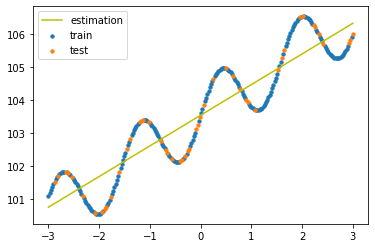

In [51]:
x = np.arange(-3, 4, 1)
y = Least_Squares_Regression(1, 0.001, 0.01)
plt.plot(x, y, color="y", label="estimation")
Error_Rate(test_data)
Tabulate()

## M = 3

In [54]:
x = np.arange(-3, 4, 1)
y = Least_Squares_Regression(3, 0.00001, 0.01)
plt.plot(x, y, color="y", label="estimation")
Error_Rate(test_data)
Tabulate()

-----
-0.401838403029437
0.0536956392911792
-1.20215946716125
0.418643725300714
-----
-0.385513664507884
0.0253584826212621
-1.11676068712598
0.236092210086364
-----
-0.370279687938930
0.00950703590305286
-1.03751861836279
0.132835803333223
-----
-0.356066825528902
-0.963886611936845
0.0745118303183225
-----
-0.342807835983653
-0.895409766906131
0.0412522187727744
-----
-0.330439592261826
-0.831694528088513
0.0223240936062827
-----
-0.318901594392697
-0.772391202722978
0.0115879027232570
-----
-0.308137209695716
-0.717183749375070


KeyboardInterrupt: 

## M = 6

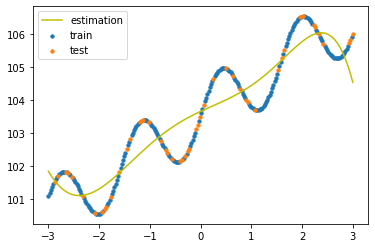

Estimated Equation :           6           5           4          3          2
-0.00395 x - 0.02577 x + 0.04684 x + 0.2019 x - 0.1535 x + 0.7196 x + 103.7
Error Rate : 
0.588749858423605


In [19]:
model = np.poly1d(np.polyfit(train[:, 0], train[:, 1], 6))
interval = np.linspace(-3,3, 100)
plt.plot(interval, model(interval), color="y", label="estimation")
Tabulate()
print("Estimated Equation : " + str(model))


#Error Rate
print("Error Rate : \n" + str(Error_Rate(test_data, model)))

## M = 9

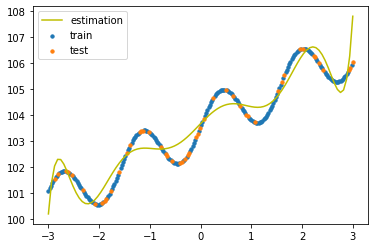

Estimated Equation :           9            8          7           6         5          4
0.009186 x + 0.001692 x - 0.1703 x - 0.02804 x + 1.009 x + 0.1496 x
          3          2
 - 2.074 x - 0.2723 x + 2.026 x + 103.7
Error Rate : 
0.44622170554308155


In [20]:
model = np.poly1d(np.polyfit(train[:, 0], train[:, 1], 9))
interval = np.linspace(-3,3, 100)
plt.plot(interval, model(interval), color="y", label="estimation")
Tabulate()
print("Estimated Equation : " + str(model))


#Error Rate
print("Error Rate : \n" + str(Error_Rate(test_data, model)))